# ASSIGNMENT-9-2

#Prepare rules for the all the data sets 1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values 2) Change the minimum length in apriori algorithm 3) Visulize the obtained rules using different plots


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
# load dataset
Book = pd.read_csv('book.csv')  
Book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


# Data preprocessing not required as it is already in transaction format

# Apriori Algorithm
# 1. Association rules with 10% Support and 70% confidence

In [3]:
# with 10% Support
frequent_itemsets = apriori(Book, min_support = 0.1, use_colnames = True)   
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [4]:
# with 70% Confidence 
rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 0.7)   
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
98,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


In [5]:
## A leverage value of 0 indicates independence. Range will be [-1 1]
## A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [6]:
rules.sort_values('lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
77,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
80,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
87,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069


In [7]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
98,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


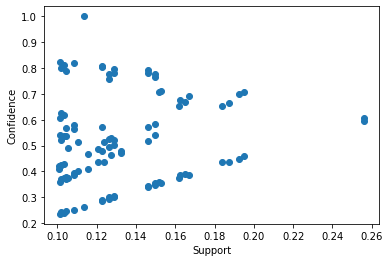

In [8]:
# visualization of obtained rule
plt.scatter(rules['support'],rules['confidence'])   
plt.xlabel('Support') 
plt.ylabel('Confidence') 
plt.show()

# 2. Association rules with 5% Support and 90% confidence


In [9]:
frequent_itemsets_1 = apriori(Book, min_support = 0.20, use_colnames = True)  # 20% Support
frequent_itemsets_1


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"


In [10]:
rules_1 = association_rules(frequent_itemsets_1, metric = 'lift', min_threshold = 0.6)  # 60% Confidence
rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


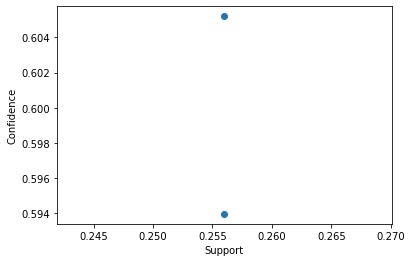

In [11]:
# Visualization of obtained rule
plt.scatter(rules_1['support'],rules_1['confidence'])   
plt.xlabel('Support')
plt.ylabel('Confidence') 
plt.show()

# 3. Association rules with 5% Support and 80% confidence

In [12]:
frequent_itemsets_2 = apriori(Book, min_support = 0.05, use_colnames = True)    # 5% Support
frequent_itemsets_2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(YouthBks, DoItYBks, GeogBks, CookBks)"
96,0.0560,"(YouthBks, GeogBks, CookBks, ArtBks)"
97,0.0650,"(DoItYBks, GeogBks, CookBks, ArtBks)"
98,0.0510,"(DoItYBks, YouthBks, CookBks, ChildBks, GeogBks)"


In [13]:
rules_2 = association_rules(frequent_itemsets_2, metric = 'lift', min_threshold = 0.8)   # 80% Confidence
rules_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
657,(DoItYBks),"(ChildBks, GeogBks, CookBks, ArtBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085
658,(ArtBks),"(DoItYBks, ChildBks, GeogBks, CookBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939
659,(CookBks),"(DoItYBks, ChildBks, GeogBks, ArtBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789
660,(ChildBks),"(DoItYBks, GeogBks, CookBks, ArtBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379


In [14]:
rules_2[rules_2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
657,(DoItYBks),"(ChildBks, GeogBks, CookBks, ArtBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085
658,(ArtBks),"(DoItYBks, ChildBks, GeogBks, CookBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939
659,(CookBks),"(DoItYBks, ChildBks, GeogBks, ArtBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789
660,(ChildBks),"(DoItYBks, GeogBks, CookBks, ArtBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379


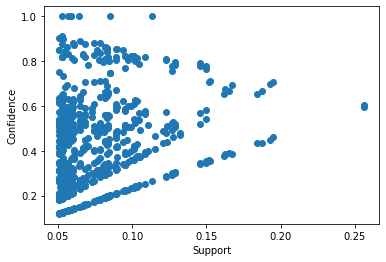

In [15]:
# Visualization of obtained rule
plt.scatter(rules_2['support'],rules_2['confidence'])  
plt.xlabel('Support')
plt.ylabel('Confidence') 
plt.show()

# 1.Lower the Confidence level Higher the no. of rules.
# 2.Higher the Support, lower the no. of rules.